The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [1]:
# Loading in required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Start coding here!

### **Exploration of the dataset nobel.csv**

In [4]:
df = pd.read_csv(r"C:\Users\Carlos\Documents\GitHub\Ana\datacamp\Data\nobel.csv")
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [5]:
df.shape

(1000, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

### **Answer to the questions**

**1.- What is the most commonly awarded gender and birth country?**

In [7]:
gender_count = df["sex"].value_counts()
df_gender = gender_count.reset_index()
df_gender.columns = ["sex","total"]
print(df_gender)

      sex  total
0    Male    905
1  Female     65


In [8]:
top_gender = df_gender.loc[df_gender["total"].idxmax(), "sex"]
print(top_gender)

Male


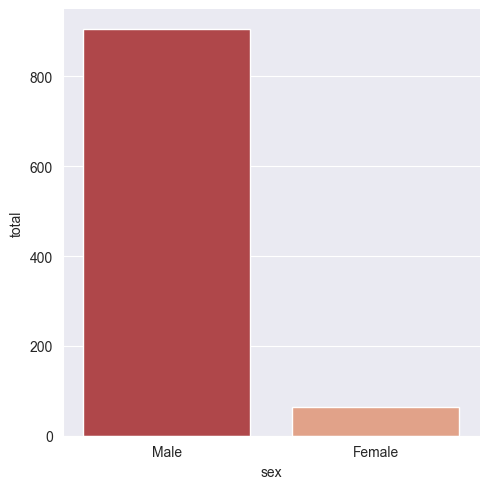

In [9]:
sns.set_style("darkgrid")
sns.set_palette("RdBu")
sns.catplot(x="sex", y="total", data=df_gender, kind="bar", hue="sex")
plt.show()

In [10]:
country_count = df["birth_country"].value_counts()
df_country = country_count.reset_index()
df_country.columns = ["country","total"]
print(df_country)

                                               country  total
0                             United States of America    291
1                                       United Kingdom     91
2                                              Germany     67
3                                               France     58
4                                               Sweden     30
..                                                 ...    ...
124  Belgian Congo (now Democratic Republic of the ...      1
125                                           Ethiopia      1
126                                            Lebanon      1
127                                        Philippines      1
128       French protectorate of Tunisia (now Tunisia)      1

[129 rows x 2 columns]


In [11]:
top_country = df_country.loc[df_country["total"].idxmax(), "country"]
print(top_country)

United States of America


In [12]:
groups = [1, 2, 3, 4]

## Group 1: [0,5)
## Group 2: [5,10)
## Group 3: [10,15)
## Group 4: [15,max)

df_country["groups"] = ""

for index,row in df_country.iterrows():
    total = row["total"]
    if 0 <= total < 5:
        df_country.at[index, "groups"] = "group 1"
    elif 5 <= total < 10:
        df_country.at[index, "groups"] = "group 2"
    elif 10 <= total < 15:
        df_country.at[index, "groups"] = "group 3"
    else:
        df_country.at[index, "groups"] = "group 4"

df_country.head()
    

,country,total,groups
0,United States of America,291,group 4
1,United Kingdom,91,group 4
2,Germany,67,group 4
3,France,58,group 4
4,Sweden,30,group 4


In [13]:
df_country_grouped = df_country["groups"].value_counts().sort_index()
print(df_country_grouped)

groups
group 1    97
group 2    15
group 3     5
group 4    12
Name: count, dtype: int64


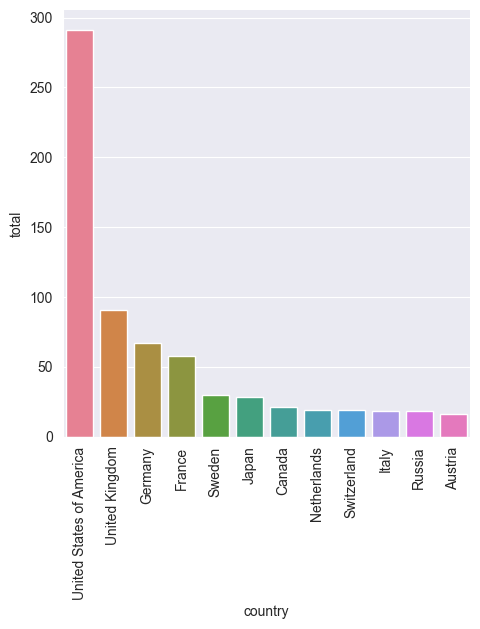

In [14]:
group_4_data = df_country[df_country["groups"] == "group 4"]

sns.set_style("darkgrid")
sns.set_palette("RdBu")
sns.catplot(x="country", y="total", data=group_4_data, kind="bar", hue="country")
plt.xticks(rotation=90)
plt.show()

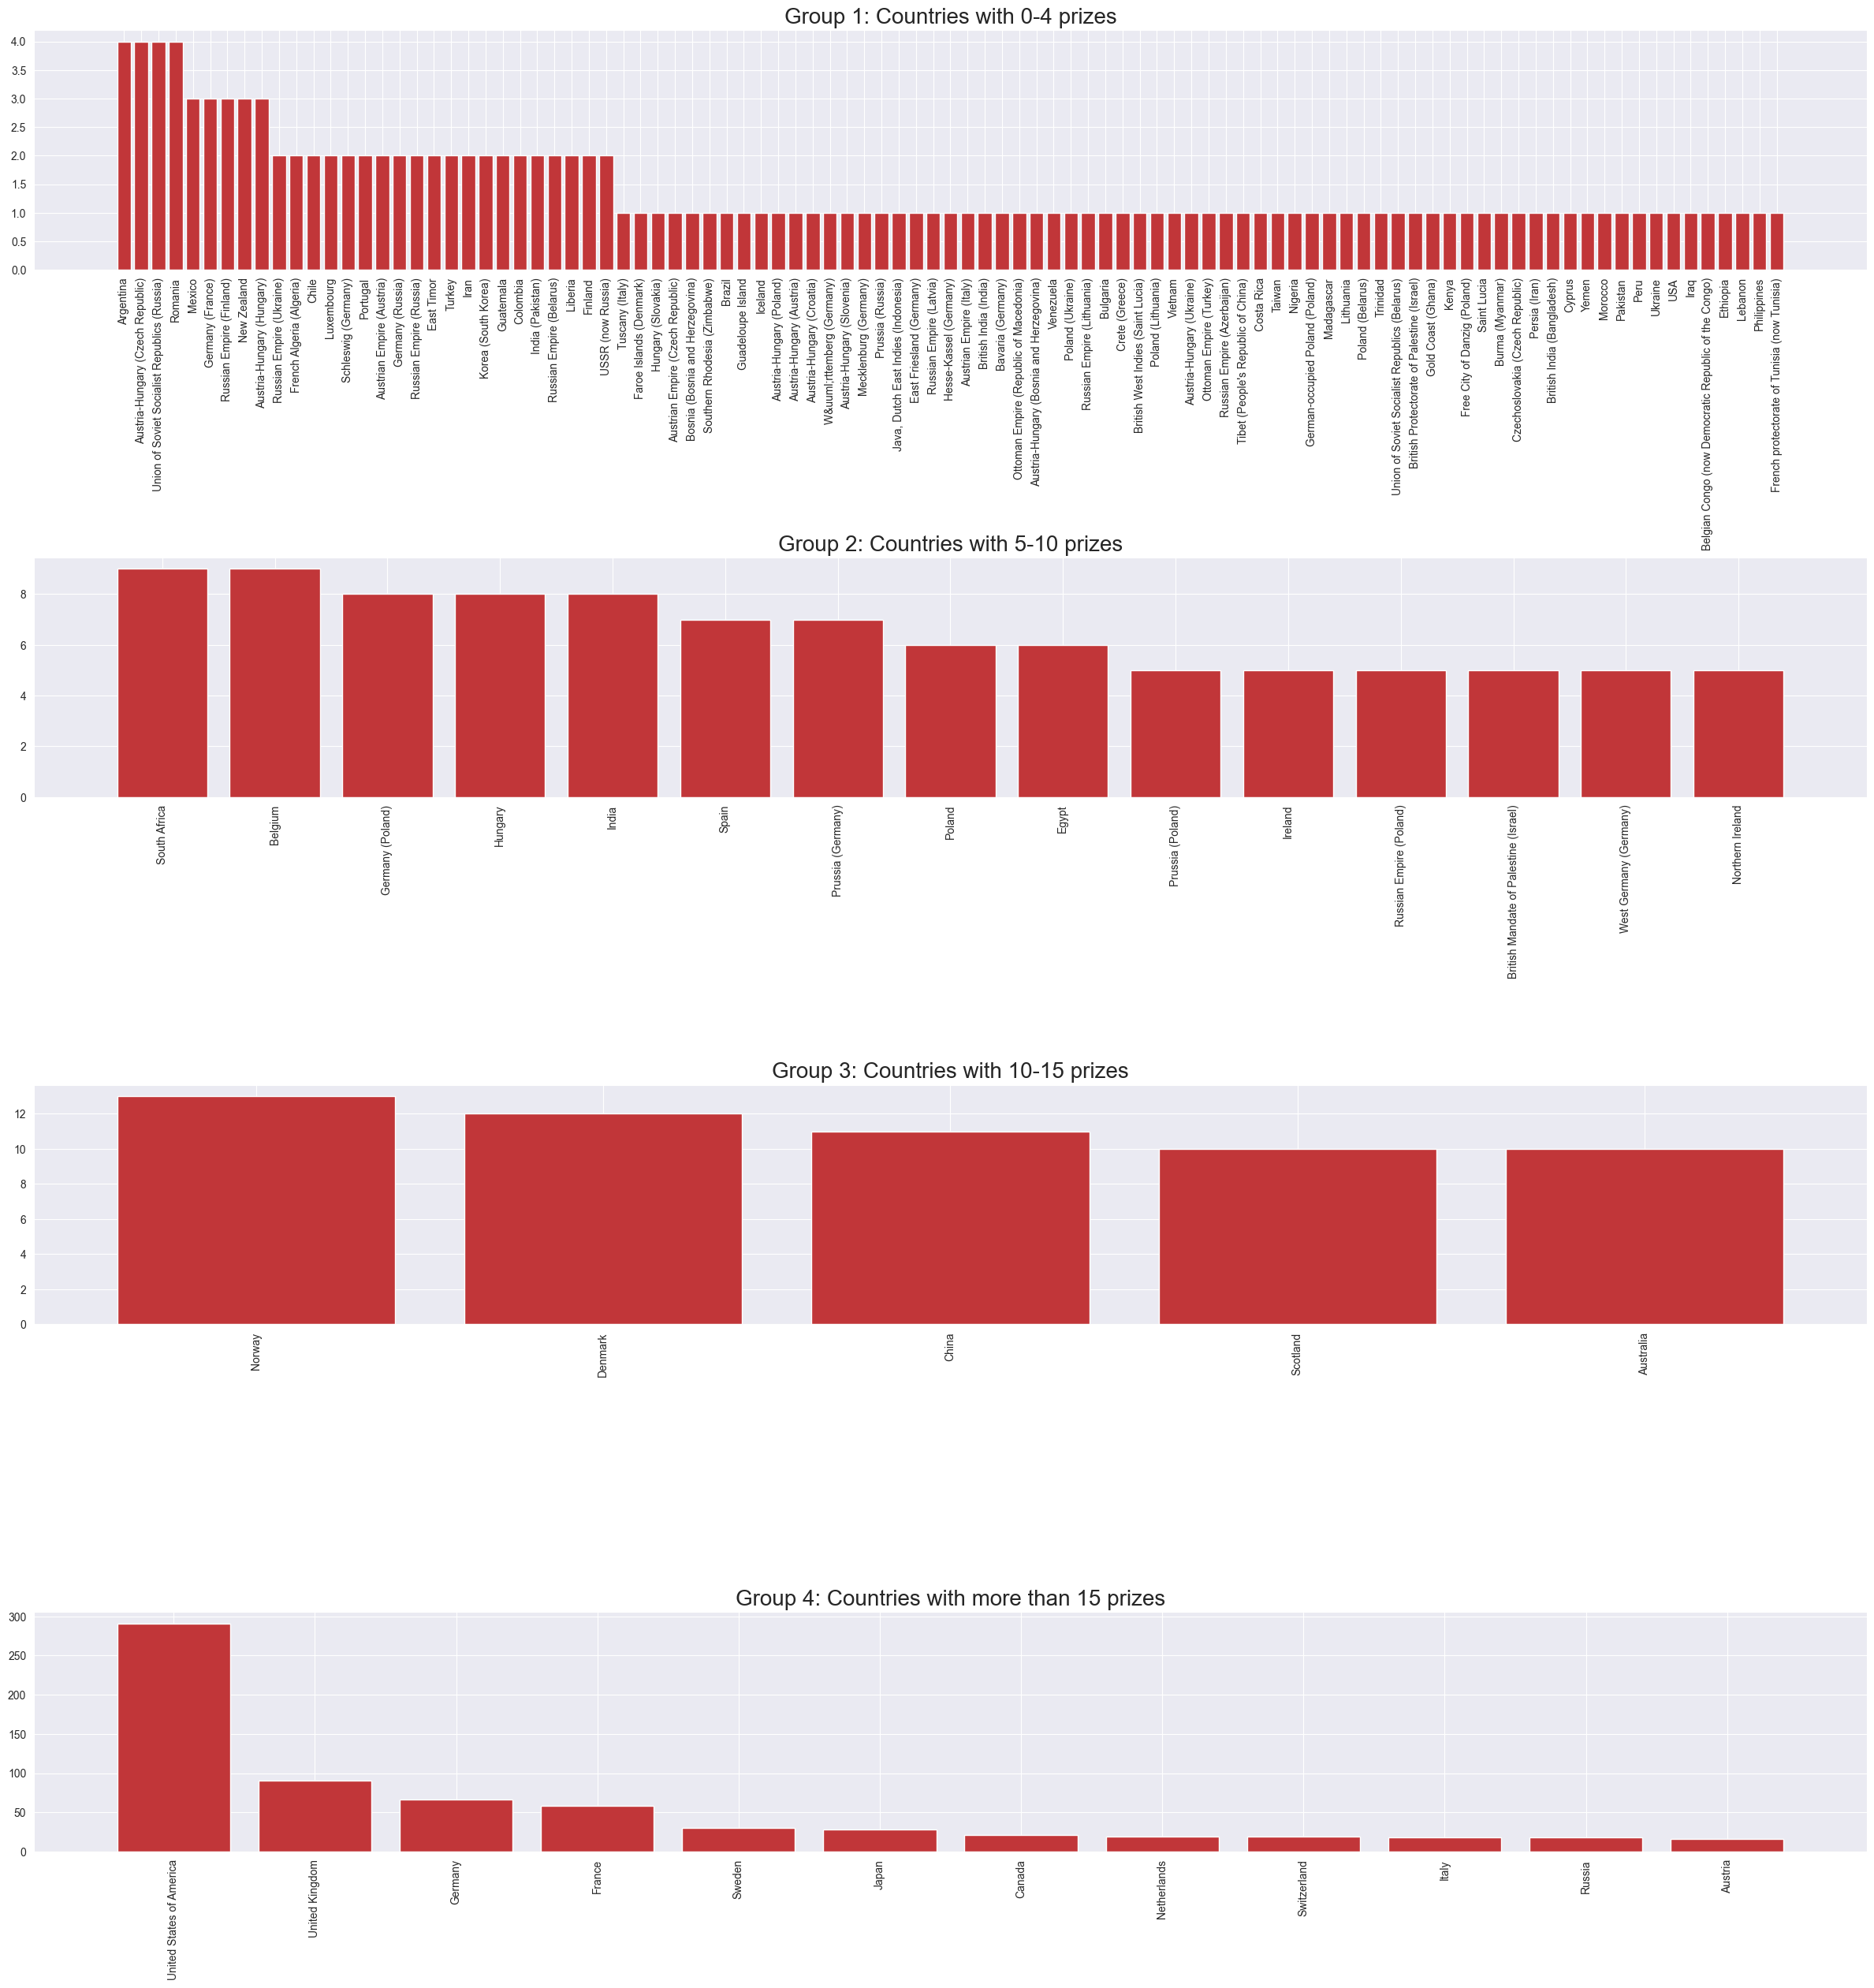

In [24]:
fig, ax = plt.subplots(4, 1, figsize=(30, 30))
sns.set_style("darkgrid")

ax[0].bar(df_country[df_country["groups"]=="group 1"]["country"], df_country[df_country["groups"]=="group 1"]["total"])
ax[0].set_title('Group 1: Countries with 0-4 prizes', fontsize=20)

ax[1].bar(df_country[df_country["groups"]=="group 2"]["country"], df_country[df_country["groups"]=="group 2"]["total"])
ax[1].set_title('Group 2: Countries with 5-10 prizes', fontsize=20)

ax[2].bar(df_country[df_country["groups"]=="group 3"]["country"], df_country[df_country["groups"]=="group 3"]["total"])
ax[2].set_title('Group 3: Countries with 10-15 prizes', fontsize=20)

ax[3].bar(df_country[df_country["groups"]=="group 4"]["country"], df_country[df_country["groups"]=="group 4"]["total"])
ax[3].set_title('Group 4: Countries with more than 15 prizes', fontsize=20)

for axes in ax.flat:
    for label in axes.get_xticklabels():
        label.set_rotation(90)

plt.subplots_adjust(hspace=1.2)
plt.show()

**2.- Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?**

In [25]:
winners_birth_USA = [0,1]

## in USA: USA
## outside: other country

for index, row in df.iterrows():
    birth_country = row["birth_country"]
    if birth_country == "United States of America":
        df.at[index, "winners_birth_USA"] = "in USA"
    else:
        df.at[index, "winners_birth_USA"] = "outside"

df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,winners_birth_USA
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,outside
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,outside
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,outside
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,outside
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,outside


In [ ]:
#decades = ["1900s", "1910s", "1920s", "1930s", "1940s", "1950s", "1960s", "1970s", "1980s", "1990s", "2000s", '2010s', '2020s']

#for index, row in df.iterrows():
    #decade = row["year"]
    #if 1900 <= decade < 1910:
        #df.at[index, "decades"] = '1900s'
    #elif 1910 <= decade < 1920:
        #df.at[index, "decades"] = '1910s'
    #elif 1920 <= decade < 1930:
     #   df.at[index, "decades"] = '1920s'
   # elif 1930 <= decade < 1940:
    #    df.at[index, "decades"] = '1930s'
    #elif 1940 <= decade < 1950:
    #    df.at[index, "decades"] = '1940s'
    #elif 1950 <= decade < 1960:
       # df.at[index, "decades"] = '1950s'
   # elif 1960 <= decade < 1970:
      #  df.at[index, "decades"] = '1960s'
    #elif 1970 <= decade < 1980:
     #   df.at[index, "decades"] = '1970s'
    #elif 1980 <= decade < 1990:
      #  df.at[index, "decades"] = '1980s'
   # elif 1990 <= decade < 2000:
      #  df.at[index, "decades"] = '1990s'
    #elif 2000 <= decade < 2010:
     #   df.at[index, "decades"] = '2000s'
   # elif 2010 <= decade < 2020:
       # df.at[index, "decades"] = '2010s'
    #elif 2020 <= decade < 2030:
      #  df.at[index, "decades"] = '2020s'

#df.head()

In [26]:
def get_decade(year):
    decade_start = (year // 10) * 10
    return f"{decade_start}s"

df['decades'] = df['year'].apply(get_decade)

df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,winners_birth_USA,decades
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,outside,1900s
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,outside,1900s
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,outside,1900s
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,outside,1900s
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,outside,1900s


In [27]:
df_USA_per_decade = df[df["winners_birth_USA"] == "in USA"].groupby("decades").size().rename("in USA").to_frame()
print(df_USA_per_decade)

         in USA
decades        
1900s         1
1910s         3
1920s         4
1930s        14
1940s        13
1950s        21
1960s        21
1970s        33
1980s        31
1990s        42
2000s        52
2010s        38
2020s        18


In [28]:
df_USA_per_decade["ratio_USA"] = df_USA_per_decade["in USA"]/df_USA_per_decade["in USA"].sum()
print(df_USA_per_decade)

         in USA  ratio_USA
decades                   
1900s         1   0.003436
1910s         3   0.010309
1920s         4   0.013746
1930s        14   0.048110
1940s        13   0.044674
1950s        21   0.072165
1960s        21   0.072165
1970s        33   0.113402
1980s        31   0.106529
1990s        42   0.144330
2000s        52   0.178694
2010s        38   0.130584
2020s        18   0.061856


In [31]:
max_decade_usa = df_USA_per_decade["ratio_USA"].idxmax()
print(max_decade_usa)

2000s


**3.- Which decade and Nobel Prize category combination had the highest proportion of female laureates?**

In [32]:
df_female_per_decade = df[df["sex"] == "Female"].groupby("decades").size().rename("women_per_decade").to_frame()
print(df_female_per_decade)

         women_per_decade
decades                  
1900s                   3
1910s                   1
1920s                   2
1930s                   3
1940s                   3
1960s                   3
1970s                   4
1980s                   4
1990s                   7
2000s                  11
2010s                  13
2020s                  11


In [33]:
df_female_per_decade["ratio_female"] = df_female_per_decade["women_per_decade"]/df_female_per_decade["women_per_decade"].sum()
print(df_female_per_decade)

         women_per_decade  ratio_female
decades                                
1900s                   3      0.046154
1910s                   1      0.015385
1920s                   2      0.030769
1930s                   3      0.046154
1940s                   3      0.046154
1960s                   3      0.046154
1970s                   4      0.061538
1980s                   4      0.061538
1990s                   7      0.107692
2000s                  11      0.169231
2010s                  13      0.200000
2020s                  11      0.169231


In [36]:
max_female_per_decade = df_female_per_decade["ratio_female"].idxmax()
print(max_female_per_decade)


2010s


In [35]:
df_female_2010s = df.loc[(df["decades"] == "2010s") & (df["sex"] == "Female"), :]
print(df_female_2010s)

     year    category                                              prize  \
847  2011       Peace                         The Nobel Peace Prize 2011   
848  2011       Peace                         The Nobel Peace Prize 2011   
849  2011       Peace                         The Nobel Peace Prize 2011   
869  2013  Literature                 The Nobel Prize in Literature 2013   
882  2014    Medicine     The Nobel Prize in Physiology or Medicine 2014   
885  2014       Peace                         The Nobel Peace Prize 2014   
893  2015  Literature                 The Nobel Prize in Literature 2015   
896  2015    Medicine     The Nobel Prize in Physiology or Medicine 2015   
927  2018     Physics                    The Nobel Prize in Physics 2018   
928  2018   Chemistry                  The Nobel Prize in Chemistry 2018   
932  2018       Peace                         The Nobel Peace Prize 2018   
935  2018  Literature                 The Nobel Prize in Literature 2018   
948  2019   

In [47]:
df_female_2010s_cat = df_female_2010s.groupby("category").size().rename("num_women").to_frame()
print(df_female_2010s_cat)

            num_women
category             
Chemistry           1
Economics           1
Literature          3
Medicine            2
Peace               5
Physics             1


In [61]:
max_female_cat = df_female_2010s_cat["num_women"].idxmax()
print(max_female_cat)

Peace


In [62]:
max_female_dic = {max_female_per_decade: max_female_cat}
print(max_female_dic)

{'2010s': 'Peace'}


**4.- Who was the first woman to receive a Nobel Prize, and in what category?**

In [63]:
df_women = df[df["sex"]=="Female"].sort_values("year", ascending=True)
print(df_women)

     year    category                                              prize  \
19   1903     Physics                    The Nobel Prize in Physics 1903   
29   1905       Peace                         The Nobel Peace Prize 1905   
51   1909  Literature                 The Nobel Prize in Literature 1909   
62   1911   Chemistry                  The Nobel Prize in Chemistry 1911   
128  1926  Literature                 The Nobel Prize in Literature 1926   
..    ...         ...                                                ...   
982  2022  Literature                 The Nobel Prize in Literature 2022   
989  2023    Medicine     The Nobel Prize in Physiology or Medicine 2023   
993  2023     Physics                    The Nobel Prize in Physics 2023   
998  2023       Peace                         The Nobel Peace Prize 2023   
999  2023   Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
19   "in recognit

In [64]:
first_woman_name = df_women.iloc[0]["full_name"]
print(first_woman_name)

Marie Curie, née Sklodowska


In [65]:
first_woman_category = df_women.iloc[0]["category"]
print(first_woman_category)

Physics


**5.- Which individuals or organizations have won more than one Nobel Prize throughout the years?**

Count the number of times each winner has won, then select those with counts of two or more, saving the full names as a list called repeats.

In [90]:
df_winners_times = df["full_name"].value_counts().rename("times").to_frame()
print(df_winners_times)

                                                    times
full_name                                                
Comité international de la Croix Rouge (Interna...      3
Frederick Sanger                                        2
Marie Curie, née Sklodowska                             2
Office of the United Nations High Commissioner ...      2
John Bardeen                                            2
...                                                   ...
Louis Brus                                              1
Aleksey Yekimov                                         1
Jon Fosse                                               1
Narges Mohammadi                                        1
William Randal Cremer                                   1

[993 rows x 1 columns]


In [109]:
df_winners_times_correct = df_winners_times.loc[(df_winners_times["times"] > 1), :].reset_index()
print(df_winners_times_correct)

                                           full_name  times
0  Comité international de la Croix Rouge (Intern...      3
1                                   Frederick Sanger      2
2                        Marie Curie, née Sklodowska      2
3  Office of the United Nations High Commissioner...      2
4                                       John Bardeen      2
5                                 Linus Carl Pauling      2


In [111]:
repeat_list = df_winners_times_correct["full_name"].to_list()
print(repeat_list)


['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'John Bardeen', 'Linus Carl Pauling']
